In [2]:
import numpy as np

In [3]:
import sklearn.datasets as datasets

In [42]:
x, y, coef = datasets.make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=20,
                                      coef=True, random_state=0)

In [44]:
x = x[:,0]

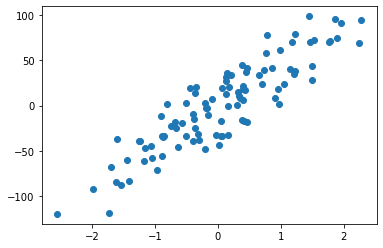

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [7]:
coef

array(42.38550486)

In [8]:
def compute_error_for_line_given_points(b0,b1,x,y):
    N = len(y)
    totalError = (1/N)*np.sum((y-(x*b1+b0))**2)
    return totalError

In [9]:
def step_gradient(b0_current, b1_current, x,y, learning_rate):
    N = len(y)
    b0_grad = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_grad = 2/N * np.sum(-x * (y - ((b1_current * x)+ b0_current)))
    new_b0 = b0_current - (learning_rate*b0_grad)
    new_b1 = b1_current - (learning_rate*b1_grad)
    return new_b0, new_b1

In [10]:
def gradient_descent_runner(x,y,b0,b1,learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0,b1,x,y,learning_rate)
    return b0, b1

In [11]:
b0 = 0

In [12]:
b1 = 0
x.shape

(100,)

In [13]:
y.shape

(100,)

In [14]:
compute_error_for_line_given_points(b0, b1,x, y)

2323.0337018661576

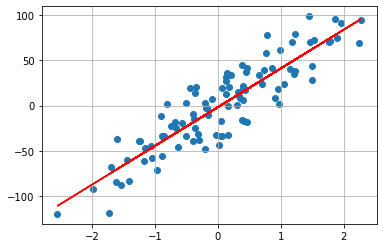

In [33]:
y_ = b0 + b1*x
plt.scatter(x, y)
plt.plot(x,y_, c='r')
plt.grid()

In [34]:
b0, b1 = step_gradient(b0,b1,x,y,0.1)


In [35]:
b0, b1 = gradient_descent_runner(x,y,b0,b1,0.01, 1000)
compute_error_for_line_given_points(b0, b1,x, y)

456.6859446727794

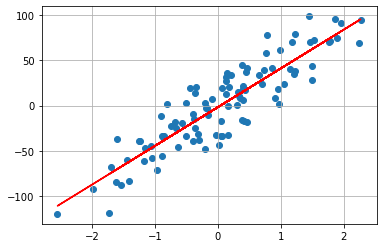

In [36]:
y_ = b0 + b1*x
plt.scatter(x, y)
plt.plot(x,y_, c='r')
plt.grid()

### Explorando  House Prices dataset

Description, which was previously available at: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [37]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizando características importantes do dataset

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
#precisa instalar o seaborn

/home/ben/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


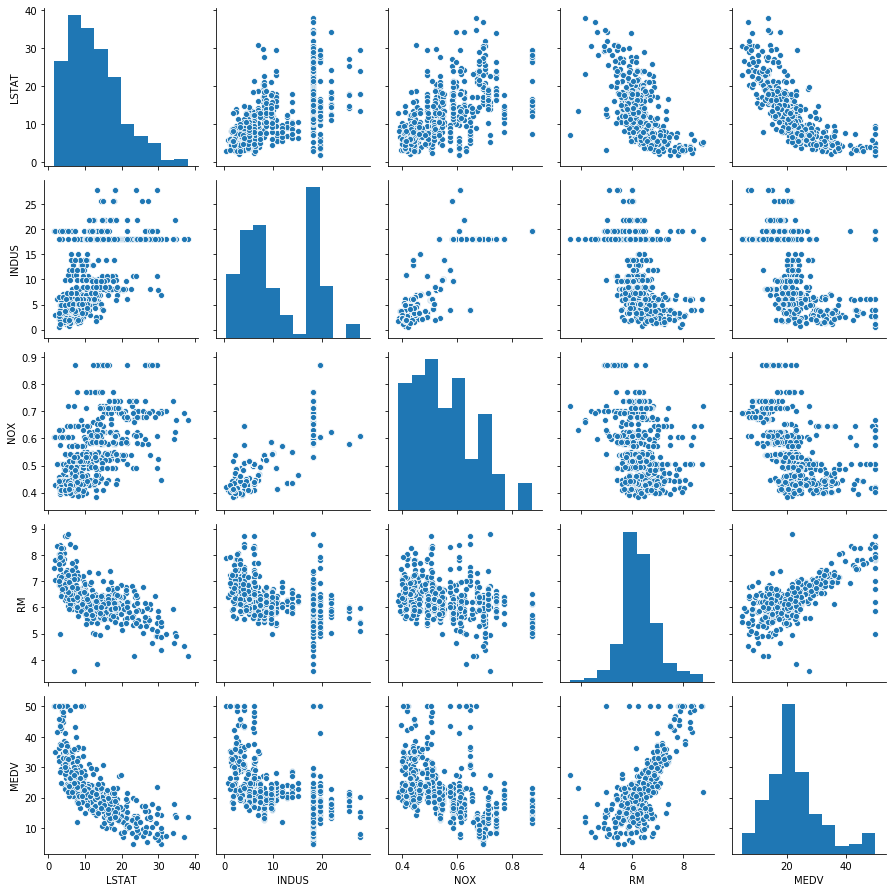

In [39]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

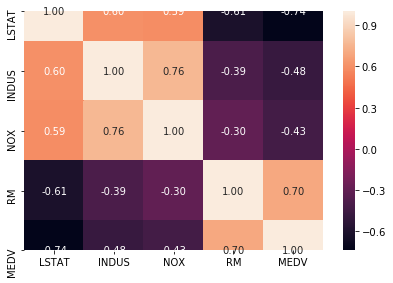

In [40]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

# Utilize uma regressão linear simples, baseada no erro quadrático


Nesta atividade utilize apenas o atributo de maior correlação com o preço para ser a variável independente (x). Use o método GD  e estime o erro utilizando as funções que foram implementadas anteriormente.

In [66]:
X = df[['RM']].values
y = df['MEDV'].values

# X = X[:, 0]

b0, b1 = gradient_descent_runner(X, y, 0, 0, learning_rate=0.01, num_iterations=1000)


# SEU CÓDIGO AQUI

/home/ben/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [61]:
def predict(X, y):
    pred = []
    for index, x in enumerate(X):
        pred.append((y[index] -(x*b1+b0))**2)
    return pred
    

In [72]:
#funçao para plotar o resultado
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

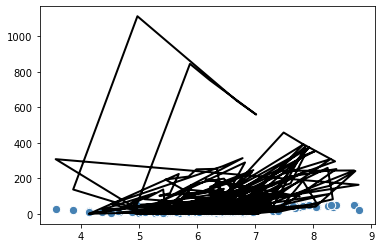

In [63]:
lin_regplot(X, y)

## Regressão usando o skcikit learn

In [64]:
from sklearn.linear_model import SGDRegressor

Use o método fit para treinar o modelo e o método predict para obter os valores preditos

In [67]:
slr = SGDRegressor()
slr.fit(X, y)
pred = slr.predict(X)

# SEU CÓDIGO AQUI


print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 4.105
Intercept: -3.982


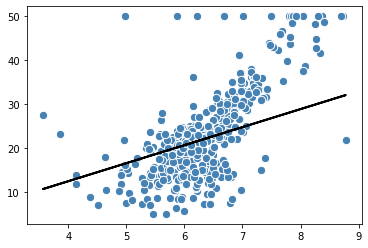

In [73]:
lin_regplot(X, y, slr)

Use o método do scikit learn para calcular o erro

In [74]:
from sklearn.metrics import mean_squared_error

In [76]:
# SEU CÓDIGO AQUI
mse = mean_squared_error(y, pred)
mse

56.41050915442577

###  Aplique o mesmo método acima considerando um conjunto maior de atributos   

In [77]:
X = df[['LSTAT', 'INDUS', 'NOX', 'RM']].values # você pode escolher outro conjunto de atributos

In [79]:
model2 = SGDRegressor()
model2.fit(X, y)
pred2 = model2.predict(X)
print(mean_squared_error(y, pred2))

# SEU CÓDIGO AQUI


31.216967400632942


Que tal usarmos a padronização dos atributos para tentar obter um resultado melhor?

## Scalonamento de atributos

A padronização de um conjunto de dados é um requisito comum para muitos estimadores de aprendizado de máquina: eles podem se comportar mal se os atributos individuais não parecerem mais ou menos com dados normalmente distribuídos padrão (por exemplo, Gaussiano com 0 média e variação de unidade).


Normalize os atributos removendo a média e escalonando para uma unidade de variância 
Nesse caso, o valor padronizado de x é calculado como:

z = (x - u) / s

Para isso, utilize o módulo StandardScaler do scikit learn. Crie um objeto tipo StandardScaler para aplicar em x, salve o resultado na variavel  e um outro para aplicar e aplique o fit_transform. Para voltar ao dado original use inverse_transform. 

In [87]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

# SEU CÓDIGO AQUI
trans_x = sc_x.fit_transform(X)

In [88]:
trans_x

array([[-1.0755623 , -1.2879095 , -0.14421743,  0.41367189],
       [-0.49243937, -0.59338101, -0.74026221,  0.19427445],
       [-1.2087274 , -0.59338101, -0.74026221,  1.28271368],
       ...,
       [-0.98304761,  0.11573841,  0.15812412,  0.98496002],
       [-0.86530163,  0.11573841,  0.15812412,  0.72567214],
       [-0.66905833,  0.11573841,  0.15812412, -0.36276709]])

Treine o modelo com os dados transformados

In [89]:
trans_model = SGDRegressor()
trans_model.fit(trans_x, y)
trans_pred = trans_model.predict(trans_x)

# SEU CÓDIGO AQUI

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 4.105
Intercept: -3.982


In [90]:
print('MSE train: %.3f, test: %.3f' , (mean_squared_error(y, trans_pred)))

MSE train: %.3f, test: %.3f 30.41464852061151


### Crie novamente um modelo, dessa vez separando os dados de treino e teste. Aplique o Grandiente descendente, plot o resultato, calcule o erro quadrático médio para os dados de teste.

In [91]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, y_train, X_test, y_test = train_test_split(X[:, 0], y, test_size=.2, shuffle=True, random_state=42)

In [99]:
final_model = SGDRegressor()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print('MSE train: %.3f, test: %.3f' , (mean_squared_error(y_test, y_pred)))

ValueError: Expected 2D array, got 1D array instead:
array=[24.91  8.47  7.83 23.29 11.28  5.08  8.01  5.77 26.45 19.78  6.75  9.45
  6.36 15.17  7.56 16.51 12.01  6.36 12.5   5.9  20.62 10.3   5.81  7.7
  6.36  4.82 15.02  3.76 27.26  7.34 13.04 17.09 28.32 12.03  8.51  3.95
  4.38 16.3  14.67  4.97 10.24 23.98 27.38 10.59 15.12 19.52 19.88  4.63
 16.22 16.44  5.21 12.04 10.21  6.58 18.13  7.79  2.94 22.98 13.15 13.15
 13.    6.87 10.45 11.98  5.91 18.03 14.81 19.15 13.35 12.27  8.77  4.59
 14.36 15.37 10.45  5.33  2.87  7.73 29.29 34.77 24.56 17.6   4.16  9.71
 17.44 34.41  3.73  8.1  14.19 11.1  15.1  16.35 26.77  5.03  6.56 15.55
 15.02 27.8   8.16 12.12  9.93  6.93  7.51  9.52  9.81  3.32  4.56  5.25
  6.78  5.98 18.13  3.54 13.61  7.85  8.67 10.42 13.27 19.77  3.92  7.26
  4.73 28.28 18.68 11.41  4.08 18.46  3.26 10.15  7.14 23.69  9.22 10.16
  5.7  14.79 12.43  5.29  5.64  5.49  6.43 14.1   6.29 19.92 13.98 10.36
 20.45 30.63 13.44  7.22 10.13 15.94 12.14 24.1   4.74  7.39  6.62 21.24
 16.65 19.37 29.53 21.52  9.51 25.41 29.68 11.34 26.42  7.37  2.98  4.21
  4.5  17.93  5.68  3.11  9.16 13.34  9.5   8.05 10.11 29.97 12.93 14.81
  8.93  7.6  14.1  10.5  18.34 17.16  3.56 12.43 17.21 10.74 11.48 15.84
 10.4   2.96 34.02 16.21  5.04 12.64  8.65  5.68 11.45 16.94  3.95  9.28
 11.64 16.9   8.61  7.79  2.47 15.76 14.37  7.79  4.14 23.34  9.29 17.19
  8.23 29.05 14.09 37.97 19.31 15.03 13.33  9.55 17.6   4.67  3.16  6.53
 11.22  4.45 24.39  7.39 15.71  9.68 12.8  14.43 26.82 20.31  5.89 21.46
  6.65  9.43 11.38 23.24 23.6   6.92  4.84 22.11 18.76 10.97  3.01  6.57
 25.79  5.33  3.11 16.74  9.42  3.13 19.69  9.38 15.69 12.03  3.57  4.7
  9.47 14.44 18.8  27.71  7.44 12.79  4.45 17.73 17.28 15.17 11.65  9.59
  7.6   1.92 24.08 21.32  6.73 16.96 15.39  7.01 29.93  6.15 14.76  8.05
  6.07 10.26 16.14  1.98 21.78 14.13 12.13 13.51  4.85 22.88  6.48 10.56
  9.54 18.06 16.03  6.27 13.99  3.59 13.59 13.22  4.86  5.98 13.65  7.43
  1.73  7.44  9.69 20.32  5.1   9.97  6.9  16.47  8.43 20.85  9.14 17.79
 18.06 16.2  22.74  5.29 10.87 20.34 17.64 11.25 14.52 14.    8.2   9.74
 13.11  5.28 10.53  8.1  12.4   8.26 11.5   5.5  31.99  6.58  3.7   9.97
 12.92 17.31  6.47 14.98 12.73  5.19 14.8  14.64 13.45 14.65  9.64 23.98
  5.39  9.08 10.29  6.68 11.32  6.86 30.81  4.61 10.88  3.53 13.83  7.9
 14.7   5.5   6.05 18.85  4.69 30.81  8.58 20.08  7.18  5.12  4.54 21.45
 12.6  13.28 12.67  6.19  8.88  8.44 16.23  9.09 29.55 17.15 14.27  7.88
 21.02  4.56  9.88 18.66 13.    5.99 23.27 10.63].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.